## COVID 19 Data Analysis

### Libraries Required

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Reading

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed.csv

In [2]:
covid_data = pd.read_csv('covid_19_data.csv')

In [3]:
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid_data_us_time_series = pd.read_csv('time_series_covid_19_confirmed_US.csv')

In [5]:
covid_data_us_time_series.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,151,151,151,151,152,152,152,154,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,15,16,16,19,19,19,19,19,21,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,68,68,69,69,69,69,69,69,69,69


In [6]:
covid_line_data = pd.read_csv('COVID19_open_line_list.csv')

In [7]:
covid_line_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aim of analysis
1. Worst hit Provinces - Most Death, Most Confirmed Cases
2. Worst hit Country  Most Death, Most Confirmed Cases
3. After what day cases spiked up in US

### Worst hit Provinces

In [8]:
grouped_data = covid_data.groupby('Province/State').sum()

Text(0.5, 1.0, 'States with most confirmed cases')

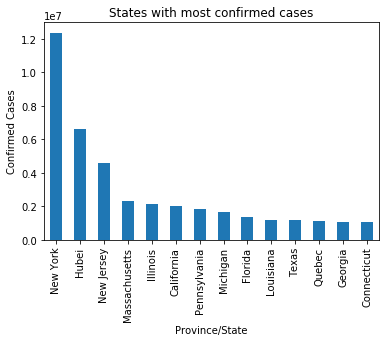

In [9]:
grouped_data['Confirmed'].sort_values( ascending = False)[0:14].plot(kind='bar')
plt.ylabel('Confirmed Cases')
plt.title('States with most confirmed cases')

Text(0.5, 1.0, 'States with most deaths')

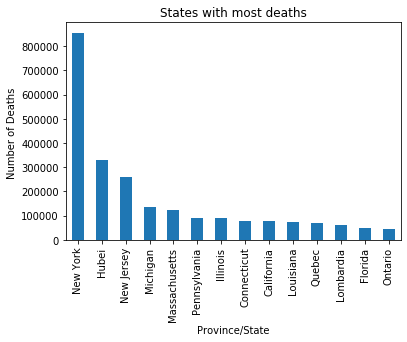

In [10]:
grouped_data['Deaths'].sort_values( ascending = False)[0:14].plot(kind='bar')
plt.ylabel('Number of Deaths ')
plt.title('States with most deaths')

### Most affected states are
1. New York
2. Hubei
3. New Jersey
4. Massacheusetts
5. Illinois

***We can also see there are some states with high number of cases but less deaths. 
Let us analyze states with worst death ratio***

In [11]:
grouped_data['Death %'] = 100*grouped_data['Deaths']/grouped_data['Confirmed']


Text(0.5, 1.0, 'States with highest death %')

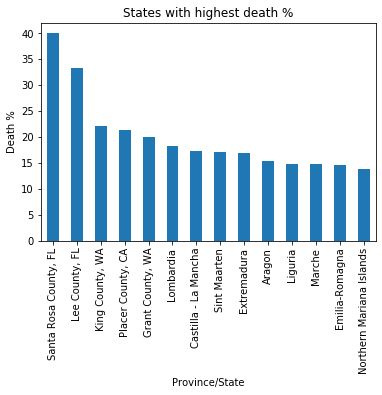

In [12]:
worst_death_ratio = grouped_data['Death %'].sort_values( ascending = False)[0:100000].index
grouped_data['Death %'].sort_values( ascending = False)[0:14].plot(kind='bar')
plt.ylabel('Death %')
plt.title('States with highest death %')

***Santa Rosa County FL, Lee County, FL, ing County WA and Placer County CA have the highest death rate***

#### Let us insepct avergae age in these provinces. Belief is that for provinces with high death ratio, age can be a significant factor. It seems that if age is not significant factor, then health system is not upto mark

In [13]:
patient_age_data = covid_line_data[['province','age']].dropna()
patient_age_data['age'] = [int(float(age.split('-')[0])) for age in patient_age_data['age'].values]
patient_age_data['age'] = patient_age_data['age'].astype('int')


In [14]:
mean_ages_by_province = patient_age_data.groupby('province').mean()

In [15]:
mean_ages_by_province = mean_ages_by_province.reset_index()

In [16]:
avg_ages = []
for province in worst_death_ratio:
    avg_age = mean_ages_by_province.loc[mean_ages_by_province['province']==province]
    if(len(avg_age)>=1):
        avg_ages.append(avg_age['age'].values[0])


Text(0.5, 1.0, 'Average age sorted by death ratio')

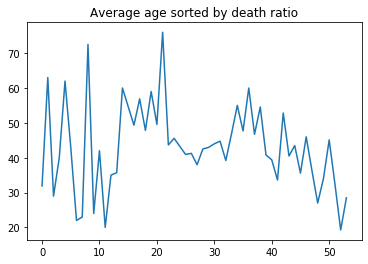

In [17]:
plt.plot(avg_ages)
plt.title('Average age sorted by death ratio')

#### We can see that age is not the only signifacnt factor for death

### Country Level Assoication

In [18]:
grouped_data = covid_data.groupby('Country/Region').sum()

Text(0.5, 1.0, 'Countries with most confirmed cases')

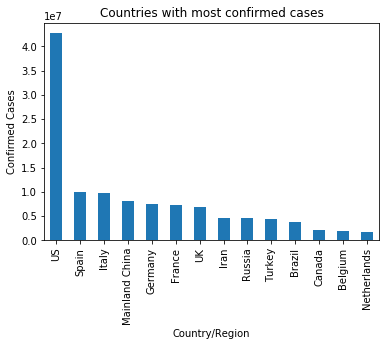

In [21]:
grouped_data['Confirmed'].sort_values( ascending = False)[0:14].plot(kind='bar')
plt.ylabel('Confirmed Cases')
plt.title('Countries with most confirmed cases')

Text(0.5, 1.0, 'Countries with most deaths')

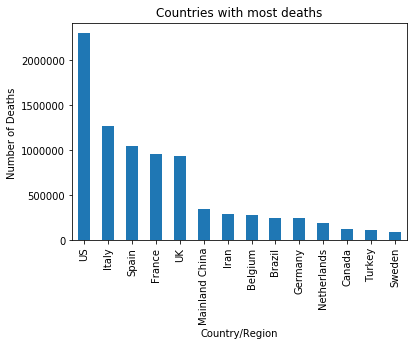

In [23]:
grouped_data['Deaths'].sort_values( ascending = False)[0:14].plot(kind='bar')
plt.ylabel('Number of Deaths ')
plt.title('Countries with most deaths')

### China has relatively less deaths ccompared to confiremd cases, UK has higher death ratio

Text(0.5, 1.0, 'States with highest death %')

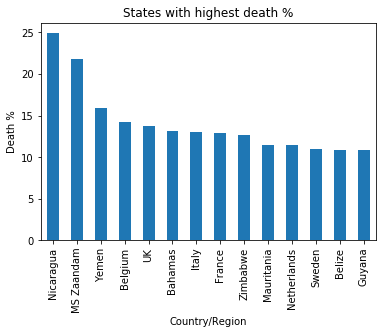

In [24]:
grouped_data['Death %'] = 100*grouped_data['Deaths']/grouped_data['Confirmed']
worst_death_ratio = grouped_data['Death %'].sort_values( ascending = False)[0:100000].index
grouped_data['Death %'].sort_values( ascending = False)[0:14].plot(kind='bar')
plt.ylabel('Death %')
plt.title('States with highest death %')

####  High Death % noted in Nicaragua, Belgium and UK

### Rise of cases in US

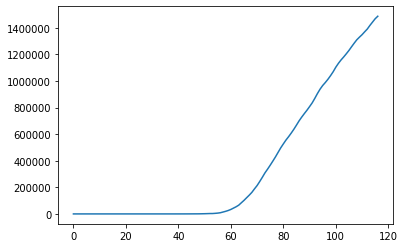

In [248]:
plt.plot(covid_data_us_time_series.values[0])

#### As we can see cases spiked up after 60th day